In [ ]:
# Applying K-means clustering on Mall Customers dataset

from sklearn.cluster import KMeans
from matplotlib.patches import Circle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Filter null and duplicate values
print("Original shape:", df.shape)
print("Null values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("Shape after dropping duplicates and nulls:", df.shape)

# Select features for clustering (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, label='Centroids')

# Draw circle around each cluster
for i, center in enumerate(centers):
    cluster_points = X[y_kmeans == i]
    radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
    circle = Circle(center, radius, color='black', fill=False, linestyle='--', linewidth=1.5)
    plt.gca().add_patch(circle)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering with Cluster Circles")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
#applying DBSCAN clustering

from sklearn.cluster import DBSCAN

obj2=DBSCAN(eps=3,min_samples=2)
y_db=obj2.fit_predict(x)
print(y_db)
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_db, cmap='rainbow', s=50)
plt.title("DBSCAN Clustering")     
 
plt.show()
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points that are close together and marks points that are far away as noise.
# ✅ You don’t need to tell it the number of clusters.
# ❌ It may mark some points as -1 (noise) if they don’t belong to any cluster.



NameError: name 'x' is not defined

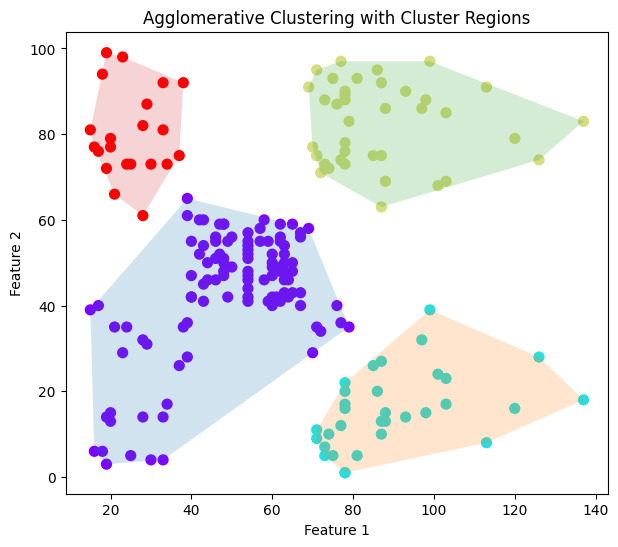

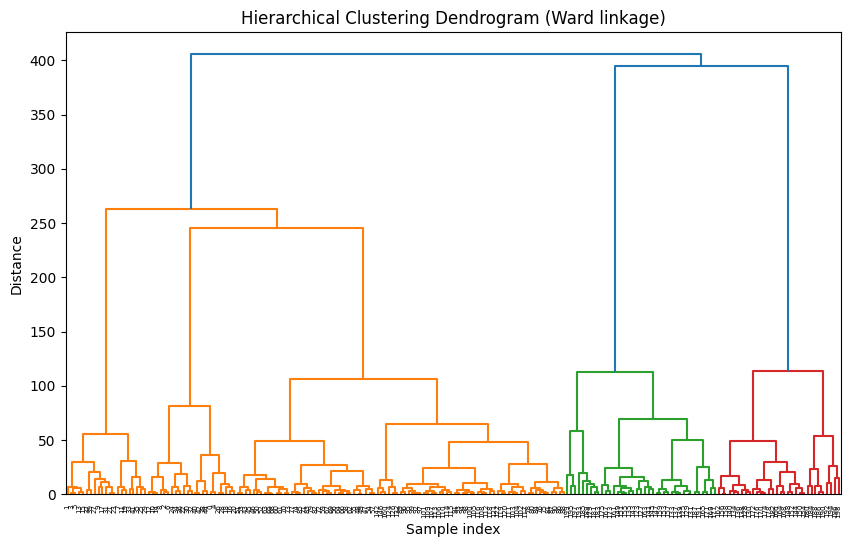

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
obj3 = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agglo = obj3.fit_predict(x)

plt.figure(figsize=(7, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_agglo, cmap='rainbow', s=50)

# Draw convex hull for each cluster
for cluster in set(y_agglo):
    points = x[y_agglo == cluster]
    if len(points) >= 3:
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], alpha=0.2)

plt.title("Agglomerative Clustering with Cluster Regions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Hierarchical clustering builds a tree of clusters by either merging or splitting them based on their similarities.
# Agglomerative clustering starts with each point as its own cluster and merges the closest pairs until the desired number of clusters is reached.
# Divisive clustering starts with all points in one cluster and splits them recursively until each point
# is its own cluster or the desired number of clusters is reached.
# You can choose different linkage criteria (e.g., single, complete, average, ward) to determine how clusters are merged.
# You need to specify the number of clusters you want.
# You can visualize the hierarchical structure using a dendrogram.

from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix for dendrogram
Z = linkage(x, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()
